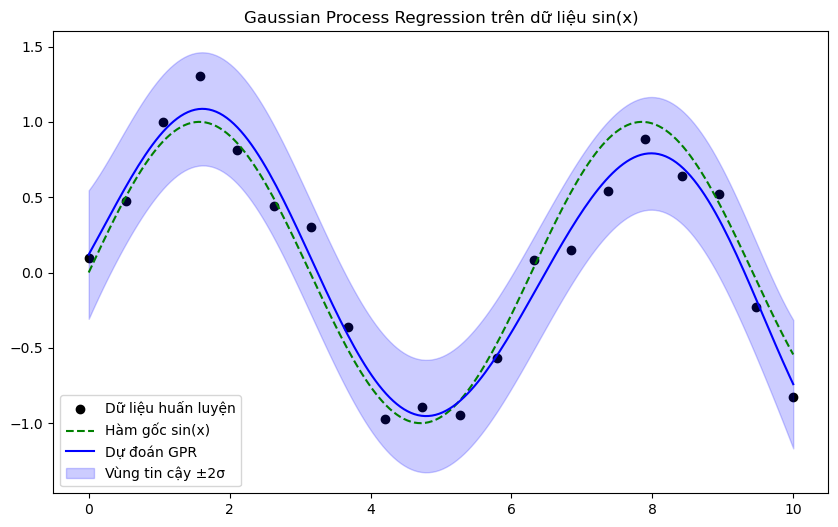

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# 1. Tạo dữ liệu
np.random.seed(42)
X = np.linspace(0, 10, 20).reshape(-1, 1)       # 20 điểm dữ liệu
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # sin(x) + nhiễu

# 2. Định nghĩa kernel
# Kernel = RBF (mịn) + WhiteKernel (cho nhiễu)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.2)

# 3. Xây mô hình GPR
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)
gpr.fit(X, y)

# 4. Dự đoán trên lưới điểm mới
X_test = np.linspace(0, 10, 200).reshape(-1, 1)
y_pred, y_std = gpr.predict(X_test, return_std=True)

# 5. Vẽ kết quả
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='black', label="Dữ liệu huấn luyện")
plt.plot(X_test, np.sin(X_test), 'g--', label="Hàm gốc sin(x)")
plt.plot(X_test, y_pred, 'b', label="Dự đoán GPR")
plt.fill_between(X_test.ravel(),
                 y_pred - 2*y_std,
                 y_pred + 2*y_std,
                 alpha=0.2, color='blue', label="Vùng tin cậy ±2σ")
plt.legend()
plt.title("Gaussian Process Regression trên dữ liệu sin(x)")
plt.show()
